In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

zip_path = '/content/drive/MyDrive/retina_dataset/retinal_images.zip'

In [ ]:
import zipfile
import os

extract_dir = '/content/dataset'  # This is where files will be extracted

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check what got extracted
print("Extracted folders:", os.listdir(extract_dir))


Extracted folders: ['datasets']


In [ ]:
import os

# Check the contents inside the 'datasets' folder
print("Contents of 'datasets':", os.listdir('/content/dataset/datasets'))


Contents of 'datasets': ['normal', 'diabetes']


In [ ]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/retina_dataset/retinal_images.zip'
extract_dir = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Top-level folders after extraction:", os.listdir(extract_dir))
print("Subfolders inside 'datasets':", os.listdir(os.path.join(extract_dir, 'datasets')))


Top-level folders after extraction: ['datasets']
Subfolders inside 'datasets': ['normal', 'diabetes']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

data_dir = '/content/dataset/datasets'

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 3138 images belonging to 2 classes.
Found 1343 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(1, activation='sigmoid')(x)
model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 273s 3s/step - accuracy: 0.6691 - loss: 0.6209 - val_accuracy: 0.6493 - val_loss: 0.6244
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 319s 3s/step - accuracy: 0.6669 - loss: 0.6140 - val_accuracy: 0.6552 - val_loss: 0.6276
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.6845 - loss: 0.6037 - val_accuracy: 0.6657 - val_loss: 0.6079
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.6782 - loss: 0.6155 - val_accuracy: 0.6605 - val_loss: 0.6170
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.6757 - loss: 0.6158 - val_accuracy: 0.6679 - val_loss: 0.6127
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.6609 - loss: 0.6155 - val_accuracy: 0.6746 - val_loss: 0.6079
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.6775 - loss: 0.6076 - val_accuracy: 0.6821 - val_loss: 0.5988
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 260s 3s/step - accuracy: 0.6814 - loss: 0.6078 - val_accuracy: 0.6835 - v

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

val_generator.reset()
y_pred_probs = model.predict(val_generator)
y_pred = (y_pred_probs > 0.5).astype(int)
y_true = val_generator.classes

print(classification_report(y_true, y_pred, target_names=['Normal', 'Diabetes']))

cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
sensitivity = recall
specificity = tn / (tn + fp)

print(f"\nConfusion Matrix:\n{cm}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall/Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step
              precision    recall  f1-score   support

      Normal       0.61      0.27      0.38       482
    Diabetes       0.69      0.90      0.78       861

    accuracy                           0.68      1343
   macro avg       0.65      0.59      0.58      1343
weighted avg       0.66      0.68      0.64      1343


Confusion Matrix:
[[132 350]
 [ 83 778]]
Accuracy: 0.6776
Precision: 0.6897
Recall/Sensitivity: 0.9036
Specificity: 0.2739
F1 Score: 0.7823


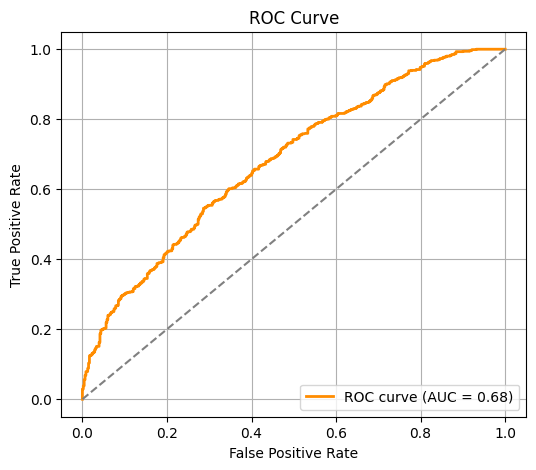

In [ ]:
fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


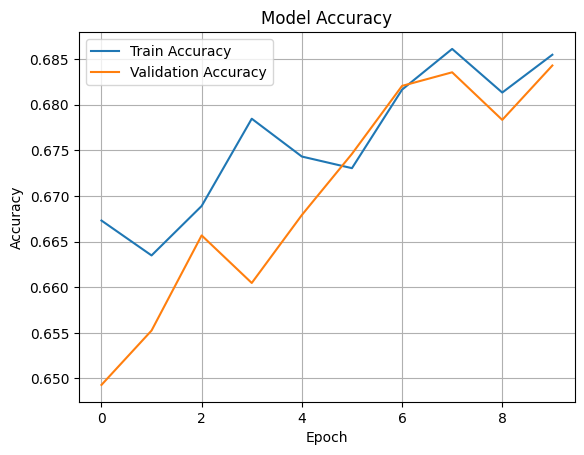

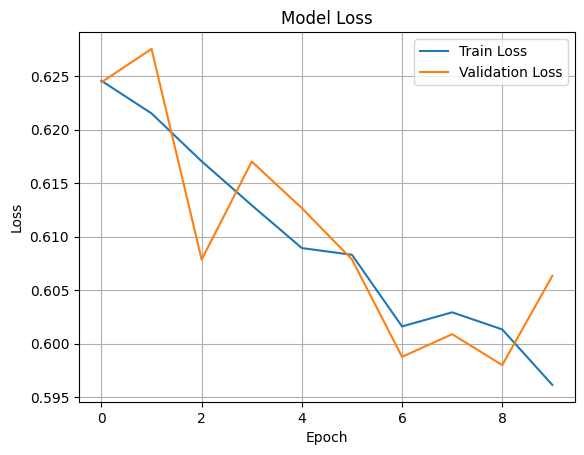

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


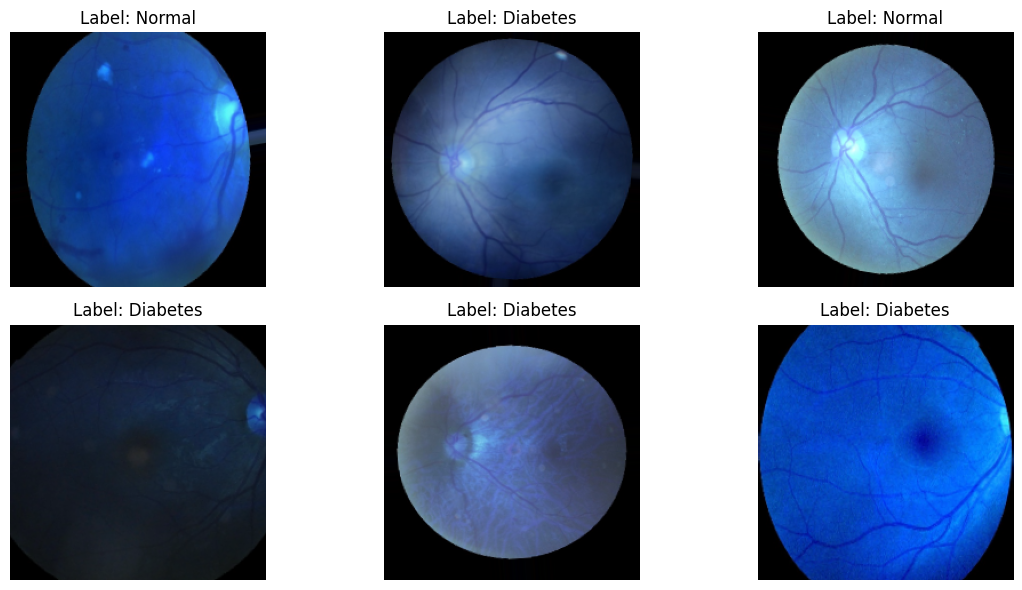

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch of images and labels
images, labels = next(train_generator)

# Plot first 6 images
plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Label: {'Diabetes' if labels[i] == 1 else 'Normal'}")
    plt.axis('off')
plt.tight_layout()
plt.show()
